<h2>Chargement des Bibliothèques et des Données</h2>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#  Configurer le style de Seaborn pour des graphiques plus esthetiques
sns.set(style="whitegrid")

 # Charger le dataset transformé
data = pd.read_csv("weather_data_transformed.csv")

# Convertir la colonne 'Date'  en format datetime si ce n'est pas déjà fait
data['Date'] = pd.to_datetime(data['Date'])

# Dispkay  the first 5 rows of the dataset
print(data.head())

                 Date  Temperature  Precipitation  Humidity   Latitude  \
0 2023-01-02 08:00:00          9.7              0      40.5  31.051307   
1 2023-01-02 14:00:00          9.2             10      63.1 -10.336078   
2 2023-01-02 23:00:00          8.4             15      33.9  52.667066   
3 2023-01-04 02:00:00         10.9              0      57.1 -21.988942   
4 2023-01-04 05:00:00         10.7              0      50.3   7.253376   

    Longitude  Temperature_F  Is_Hot  Temp_Fahrenheit  
0  118.643699          49.46       0            49.46  
1  111.846085          48.56       0            48.56  
2   52.461016          47.12       0            47.12  
3  -41.021663          51.62       0            51.62  
4 -147.686580          51.26       0            51.26  


<h2>Etape 1 : Préparer les données pour une analyse 
mensuelle</h2>

In [ ]:
# Extraire  le mois de la date
data['Month'] = data['Date'].dt.month

# Calculer la temp moyenne,  les précipitations totales et l'humidité moyenne par mois
monthly_data = data.groupby('Month').agg({
    'Temperature': 'mean',
    'Precipitation': 'sum',
    'Humidity': 'mean'
}).reset_index()

# Afficher les données  agrégées
print(monthly_data)

    Month  Temperature  Precipitation   Humidity
0       1    13.701429            180  54.397143
1       2    20.898649            220  65.025676
2       3    24.832927            125  69.276829
3       4    24.568966            105  67.949425
4       5    20.482022            140  66.176404
5       6    14.524051            145  53.120253
6       7     6.250602            130  45.961446
7       8    -0.787000            210  37.490000
8       9    -4.782051            105  34.301282
9      10    -4.322785            160  35.282278
10     11    -0.522222            195  38.168889
11     12     6.380899            125  44.075281


<h2>Etape 2 : Créer une courbe pour les températures 
mensuelles</h2>

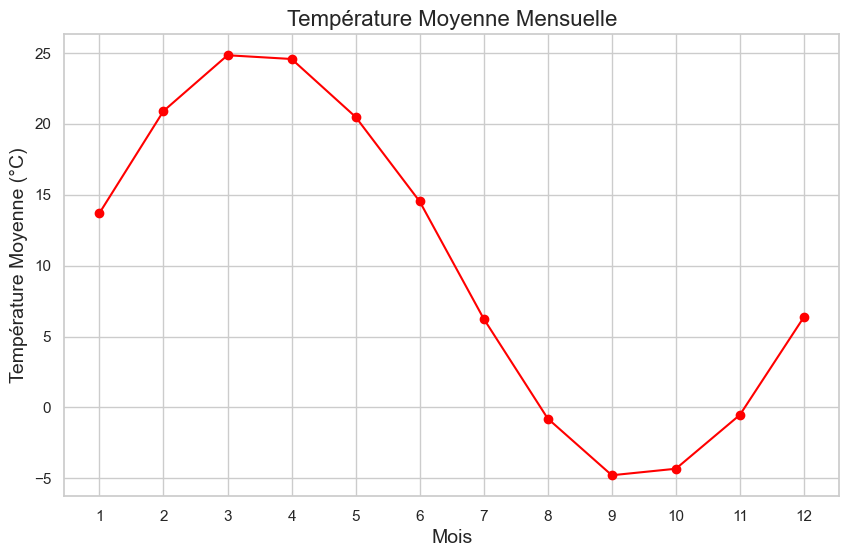

In [ ]:
# Créer une  courbe des temp moyenne par mois
plt.figure(figsize=(10,6))
plt.plot(monthly_data['Month'], monthly_data['Temperature'], marker='o', linestyle='-', color='red')

 # Ajouter les titres et les étiquettes
plt.title('Température Moyenne Mensuelle', fontsize=16)
plt.xlabel('Mois', fontsize=14)
plt.ylabel('Température Moyenne (°C)', fontsize=14)
plt.xticks(monthly_data['Month'])
plt.grid(True)
plt.show()

<h2>Etape 3 : Visualiser les précipitations mensuelles avec un 
histogramme</h2>

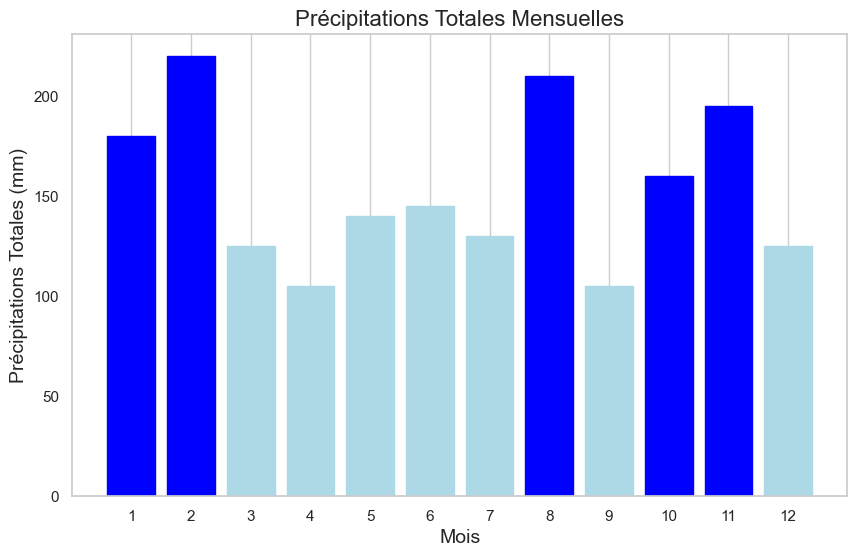

In [ ]:
# Créer une histogramme des précipitations totales par mois
plt.figure(figsize=(10,6))
bars = plt.bar(monthly_data['Month'], monthly_data['Precipitation'], color='skyblue', edgecolor='black')

# Ajouter les titres et les étiquettes
plt.title('Précipitations Totales Mensuelles', fontsize=16)
plt.xlabel('Mois', fontsize=14)
plt.ylabel('Précipitations Totales (mm)', fontsize=14)
plt.xticks(monthly_data['Month'])
plt.grid(axis='y')

# Colorer les barres en fonctionne du niveau de précipitation
for bar, precip in zip(bars, monthly_data['Precipitation']):
    if precip > monthly_data['Precipitation'].mean():
        bar.set_color('blue')
    else:
        bar.set_color('lightblue')

plt.show()

<h2>Etape 4 : Créer un tableau de bord interactif</h2>

In [5]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Créer un tableau de bord avec deux graphiques
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=('Température Moyenne Mensuelle', 'Précipitations Totales Mensuelles'))

# Ajouter la courbe des températures
fig.add_trace(
    go.Scatter(
        x=monthly_data['Month'],
        y=monthly_data['Temperature'],
        mode='lines+markers',
        name='Température Moyenne',
        line=dict(color='red')
    ),
    row=1, col=1
)

# Ajouter l'histogramme des précipitations
fig.add_trace(
    go.Bar(
        x=monthly_data['Month'],
        y=monthly_data['Precipitation'],
        name='Précipitations Totales',
        marker_color='blue'
    ),
    row=2, col=1
)

# Mettre à jour la mise en page
fig.update_layout(
    height=800,
    title_text='Tableau de Bord Interactif des Tendances Climatiques Mensuelles',
    xaxis=dict(title='Mois'),
    xaxis2=dict(title='Mois'),
    yaxis=dict(title='Température Moyenne (°C)'),
    yaxis2=dict(title='Précipitations Totales (mm)')
)

# Rendre le graphique interactif avec des curseurs et des outils de zoom
fig.update_layout(hovermode='x unified')

# Afficher le tableau de bord
fig.show()